# Part 1 - Data Preprocessing

## Importing the libraries

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the training set

In [2]:
dataset_train = pd.read_csv('META_TRAINING_DATA.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
dataset_train.shape

(2545, 7)

## Taking care of missing values if present inside the dataset

In [4]:
dataset_train.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

## Creating a data structure with 120 timesteps and 1 output
1 month= 20 financial day |
3 month= 60 financial day |
6 month= 120 financial day



In [6]:
X_train = []
y_train = []
for i in range(120, 2545):
    X_train.append(training_set_scaled[i-120:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

## Reshaping

In [7]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

## Importing the Keras libraries and packages

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

## Initialising the RNN

In [9]:
regressor = Sequential()

## Adding the first LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

## Adding the second LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

## Adding the third LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

## Adding the fourth LSTM layer and some Dropout regularisation

In [13]:
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

## Adding the fifth LSTM layer and some Dropout regularisation

In [14]:
regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.2))

## Adding the output layer

In [15]:
regressor.add(Dense(units = 1))

## Compiling the RNN

In [16]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

## Fitting the RNN to the Training set

In [17]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
76/76 [==============================] - 37s 367ms/step - loss: 0.0211
Epoch 2/100
76/76 [==============================] - 28s 371ms/step - loss: 0.0031
Epoch 3/100
76/76 [==============================] - 31s 413ms/step - loss: 0.0028
Epoch 4/100
76/76 [==============================] - 31s 404ms/step - loss: 0.0025
Epoch 5/100
76/76 [==============================] - 31s 410ms/step - loss: 0.0024
Epoch 6/100
76/76 [==============================] - 32s 416ms/step - loss: 0.0024
Epoch 7/100
76/76 [==============================] - 32s 421ms/step - loss: 0.0022
Epoch 8/100
76/76 [==============================] - 33s 428ms/step - loss: 0.0018
Epoch 9/100
76/76 [==============================] - 34s 444ms/step - loss: 0.0020
Epoch 10/100
76/76 [==============================] - 33s 434ms/step - loss: 0.0021
Epoch 11/100
76/76 [==============================] - 33s 438ms/step - loss: 0.0017
Epoch 12/100
76/76 [==============================] - 33s 439ms/step - loss: 0.0017
E

76/76 [==============================] - 34s 443ms/step - loss: 5.9731e-04
Epoch 97/100
76/76 [==============================] - 33s 437ms/step - loss: 6.6629e-04
Epoch 98/100
76/76 [==============================] - 34s 450ms/step - loss: 6.1429e-04
Epoch 99/100
76/76 [==============================] - 34s 442ms/step - loss: 5.9688e-04
Epoch 100/100
76/76 [==============================] - 34s 442ms/step - loss: 5.6608e-04


## Part 3 - Making the predictions and visualising the results

## Getting the real stock price of july 2022

In [18]:
dataset_test = pd.read_csv('META_TESTING_DATA.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

## Getting the predicted stock price of july 2022

In [26]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 120:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(120, 140):
    X_test.append(inputs[i-120:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 101ms/step


## Visualising the results

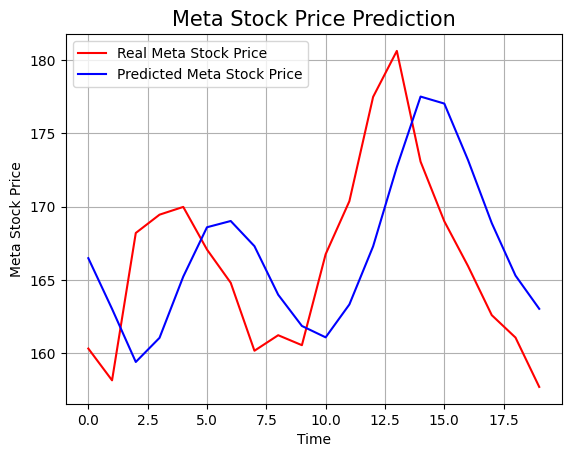

In [47]:
plt.plot(real_stock_price, color = 'red', label = 'Real Meta Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Meta Stock Price')
plt.title('Meta Stock Price Prediction',fontsize=15)
plt.xlabel('Time')
plt.grid()

plt.ylabel('Meta Stock Price')
plt.legend()
plt.show()

### However for our specific Stock Price Prediction problem, evaluating the model with the RMSE does not make much sense, since we are more interested in the directions taken by our predictions, rather than the closeness of their values to the real stock price. We want to check if our predictions follow the same directions as the real stock price and we don’t really care whether our predictions are close the real stock price. The predictions could indeed be close but often taking the opposite direction from the real stock price.

In [48]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

In [49]:
rmse

6.263455841054348

## Observations

### To be very honest it is exactly impossible to predict the future stock prices otherwise we would all become billonaries but it is possible to predict the patterns that we have predicted. we have predicted the upward and downward trends that exist in the meta stock price

### In or around 7.5 to 11 days price of the shares may be less then it means we can purchase more number of shares from the stockbroker and between 12.5 to 16 when the price of shares will increase then we will sell them to earn more profit

### We have big spike like a stock time singularity and our predictions did not follow that but that is completely normal our model just lags behind because it cannot react  fast to non-linear changes and according to the Brownian motion mathematical concept in financial engineering the future variations of the stock price are independent from the past and the good news is that our model reacts very okay to the smooth changes and one more Good news is that we have predicted almost the same pattern as in the real stock price as both of them are forming 'M' like structure.